**Importing all the Libraries**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
data = pd.read_csv("dataa.csv")

In [3]:
data.head()

,x1,x2,y
0,-119.366669,115.000000,1
1,-101.108044,97.777159,1
2,-130.278658,106.767654,1
3,-114.703415,101.195477,1
4,-119.366669,115.000000,1


In [4]:
data.shape

(2227, 3)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2227 entries, 0 to 2226
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      2222 non-null   float64
 1   x2      2224 non-null   float64
 2   y       2227 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 52.3 KB


C:\ANACONDA\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


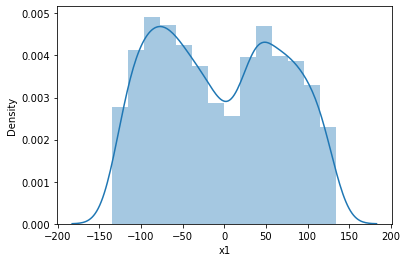

In [17]:
sns.distplot(data.x1, kde=True)

The Distribution of 1st independent variable x1

C:\ANACONDA\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


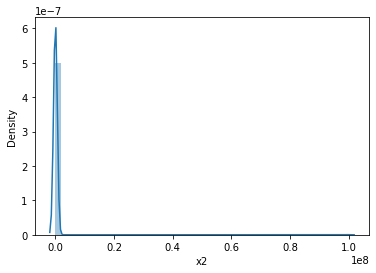

In [18]:
sns.distplot(data.x2, kde=True)

The Distribution of 1st independent variable x2

**Visualization on dependent variable**

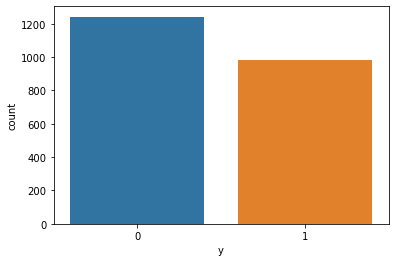

In [30]:
sns.countplot(x=data.y)

We need to Convert our data to Log normal before we pass it on our model and train them in order to get the accurate results

**Pre-processing**

In [20]:
#Checking for the null values 
data.isnull().sum()

x1    5
x2    3
y     0
dtype: int64

We fill all the missing values with their respective median values and instead of dropping them off.

In [26]:
data['x1'].fillna(data['x1'].median(), inplace=True)

In [27]:
data['x2'].fillna(data['x2'].median(), inplace=True)

In [28]:
data.isnull().sum()

x1    0
x2    0
y     0
dtype: int64

As we can Clearly see now there are no missing values 

In [31]:
from scipy import stats

In [81]:
data['x1'] = np.random.normal(loc = data['x1'].mean(), scale = data['x1'].std(), size=2227)

C:\ANACONDA\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


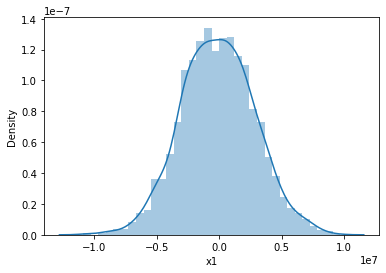

In [82]:
sns.distplot(data['x1'])

In [83]:
data['x2'] = np.random.normal(loc = data['x2'].mean(), scale = data['x2'].std(), size=2227)

C:\ANACONDA\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


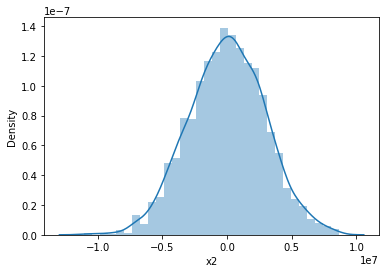

In [84]:
sns.distplot(data['x2'])

**Splitting the Data**

In [97]:
X = data.drop(columns='y')
y = data['y']

In [98]:
from sklearn.preprocessing import StandardScaler

In [99]:
Scaler = StandardScaler()

In [100]:
X = Scaler.fit_transform(X)

In [102]:
from sklearn.model_selection import train_test_split

In [325]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=40)

In [326]:
X_train.shape

(1558, 2)

In [327]:
X_test.shape

(669, 2)

In [328]:
y_train.shape

(1558,)

In [329]:
y_test.shape

(669,)

**Training on different models**

$LOGISTIC\ REGRESSION$

In [330]:
from sklearn.linear_model import LogisticRegression

In [331]:
model1 = LogisticRegression(penalty='l2')

In [332]:
model1.fit(X_train, y_train)

LogisticRegression()

In [333]:
y_pred1 = model1.predict(X_test)

$SVM\ WITH\ LINEAR\ KERNEL$

In [334]:
from sklearn.svm import SVC

In [335]:
model2 = SVC(C=1.6, kernel='linear') 

In [336]:
model2.fit(X_train, y_train)

SVC(C=1.6, kernel='linear')

In [337]:
y_pred2 = model2.predict(X_test)

$SVM\ WITH\ RBF\ KERNEL$

In [338]:
model3 = SVC(C=1.0, gamma='scale', kernel='rbf') 

In [339]:
model3.fit(X_train, y_train)

SVC()

In [340]:
y_pred3 = model3.predict(X_test)

$KNN$

In [341]:
from sklearn.neighbors import KNeighborsClassifier

In [342]:
KNN = KNeighborsClassifier(n_neighbors=5, p=2)

In [343]:
KNN.fit(X_train, y_train)

KNeighborsClassifier()

In [344]:
y_pred_knn = KNN.predict(X_test)

**Let's Compare all the models using  Evaluation metrics**

In [345]:
from sklearn.metrics import accuracy_score

In [346]:
print("Accuracy Score for Logistic Regression:", accuracy_score(y_pred1, y_test))
print("Accuracy Score for SVM for Linear Kernel:", accuracy_score(y_pred2, y_test))
print("Accuracy Score for SVM for rbf Kernel:", accuracy_score(y_pred3, y_test))
print("Accuracy Score for KNN:", accuracy_score(y_pred_knn, y_test))

Accuracy Score for Logistic Regression: 0.5590433482810164
Accuracy Score for SVM for Linear Kernel: 0.5739910313901345
Accuracy Score for SVM for rbf Kernel: 0.5739910313901345
Accuracy Score for KNN: 0.5396113602391629


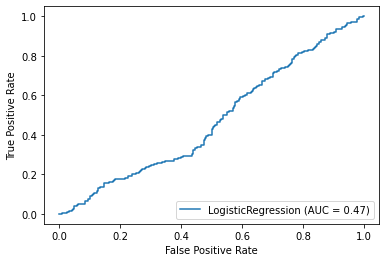

In [347]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(model1, X_test, y_test)

AUC ROC Curve for Logistic Regression

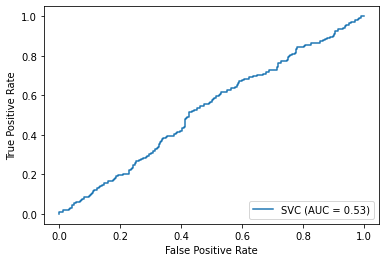

In [348]:
plot_roc_curve(model2, X_test, y_test)

AUC ROC Curve for SVM with linear kernel

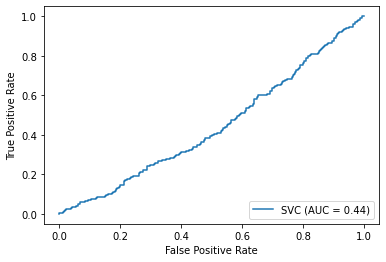

In [349]:
plot_roc_curve(model3, X_test, y_test)

AUC ROC Curve for SVM with rbf kernel

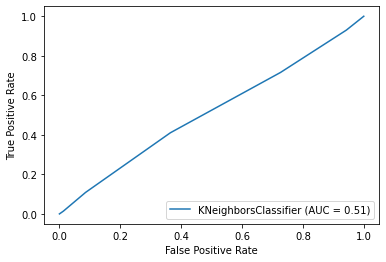

In [350]:
plot_roc_curve(KNN, X_test, y_test)

AUC ROC Curve for KNN

**Conclusion:**\
From the above Evaluation metrics we can conclude that SVM with linear Kernel shows better accuracy than rest of the above models.